In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
df = pd.read_csv(r"C:\Users\Malli Mounika\Downloads\Walmart_customer_purchases.csv")

df

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,80853da9-ef96-4c83-9191-bc872c3968a9,48,Male,Barbaramouth,Electronics,Laptop,2024-11-18,391.48,Debit Card,No,5,No
49996,97df1ed3-4041-474c-8ce8-958c816fc30a,51,Female,Troyshire,Beauty,Perfume,2024-11-19,272.09,Cash on Delivery,Yes,1,No
49997,948efe87-82a3-4a38-9dd6-30d44ad6f879,51,Male,South Rachel,Home,Curtains,2024-02-11,280.81,Debit Card,Yes,2,No
49998,9804d52f-35cd-4af3-a9e3-cbb8367396f0,33,Other,Courtneyville,Beauty,Shampoo,2024-08-31,140.74,Debit Card,No,2,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [6]:
df.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [7]:
df.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


In [9]:
#Select Purchase Amount Column

purchase_amounts = df['Purchase_Amount']

# Remove missing or invalid values
purchase_amounts = purchase_amounts.dropna()

In [13]:
#Mean and Standard Deviation

mean = purchase_amounts.mean()
std = purchase_amounts.std()

mean, std


(np.float64(255.53222960000002), np.float64(141.57441582936244))

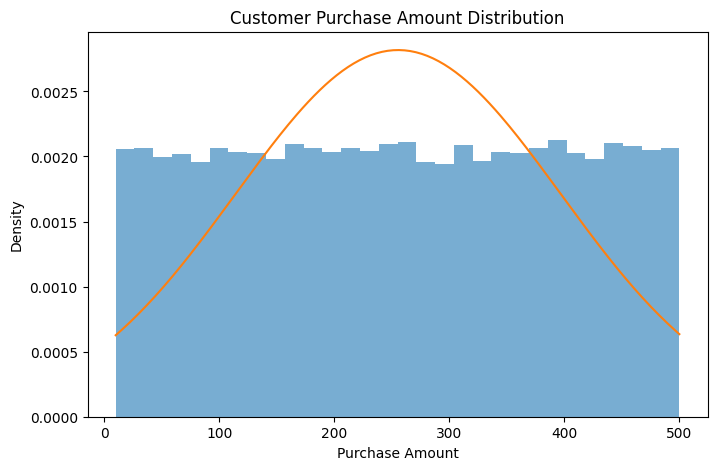

In [14]:
#Histogram + Normal Curve

plt.figure(figsize=(8,5))

# Histogram
plt.hist(purchase_amounts, bins=30, density=True, alpha=0.6)

# Normal distribution (manual)
x = np.linspace(purchase_amounts.min(), purchase_amounts.max(), 200)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

plt.plot(x, pdf)
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.title("Customer Purchase Amount Distribution")
plt.show()

In [15]:
#Probability of Spending Above a Threshold 

threshold = 300

# Normal CDF using error function
z = (threshold - mean) / (std * math.sqrt(2))
probability = 1 - 0.5 * (1 + math.erf(z))

print(f"Probability that a customer spends more than ₹{threshold}: {probability:.4f}")

Probability that a customer spends more than ₹300: 0.3767


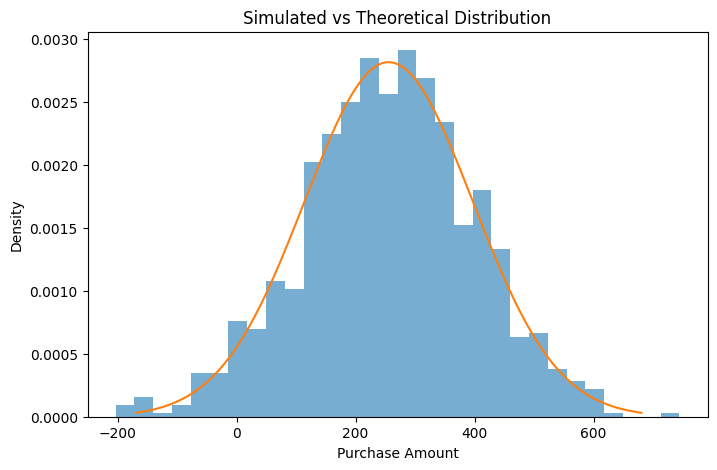

In [16]:
#Simulate Random Sales Data

simulated_sales = np.random.normal(mean, std, 1000)

plt.figure(figsize=(8,5))
plt.hist(simulated_sales, bins=30, density=True, alpha=0.6)

x = np.linspace(mean - 3*std, mean + 3*std, 200)
pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

plt.plot(x, pdf)
plt.xlabel("Purchase Amount")
plt.ylabel("Density")
plt.title("Simulated vs Theoretical Distribution")
plt.show()